<a href="https://colab.research.google.com/github/Ali-Ahmadi/Digital-Image-Processing/blob/master/01_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Enhancement - Image Histogram 
![histogram of an image](https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20172018/_images/histeq.png)

In this section you will see how to calculate and plot the histogram and cumulative histogram of an image using OpenCV in python. 

You can find more information in OpenCV documentation.
[here](https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html)

Import required packages necessary for image processing.

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

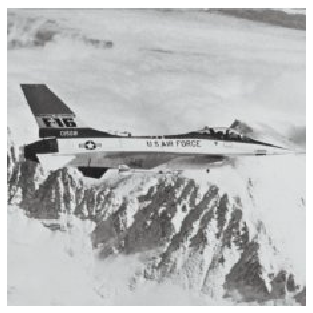

In [2]:
img = cv2.imread('airplane_grayscale.jpg')
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

## 1-Histogram of an image

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

**images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

**channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

**mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

**histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

**ranges** : this is our RANGE. Normally, it is [0,256].

Text(0, 0.5, 'Frequency')

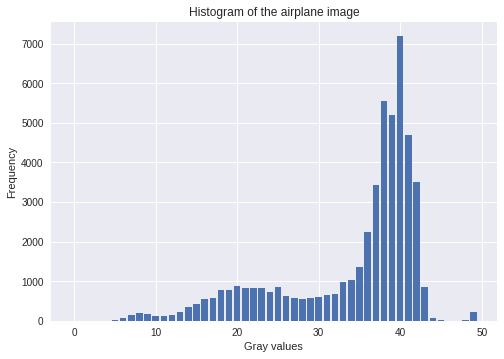

In [3]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the airplane image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

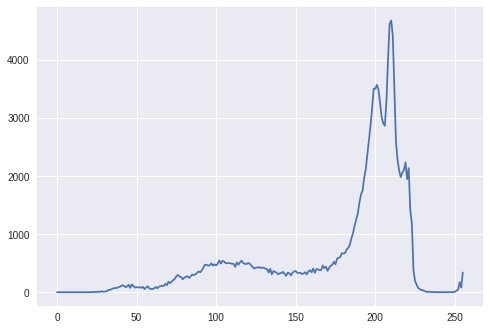

In [4]:
# Another method
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

Let's look at another example.

In [0]:
# Let's read two other images
high = cv2.imread('hist_highkey.jpg')
low = cv2.imread('hist_lowkey.jpg')

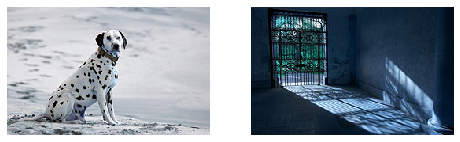

In [6]:
# show images
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

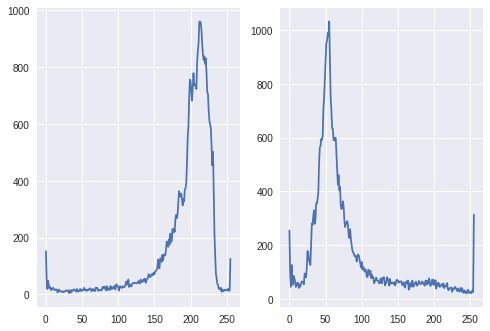

In [7]:
# Calculate histogram of both images for the last channel.
# Channels can differ from 0 to 2.
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

# Plot histograms
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

## 2-Cumulative histogram of an image

**Calculate cumulative distribution function (CDF) of an image**

The cumulative histogram of an image is produced by calculating the cumulative sum of that image's histogram. There is no specific function in OpenCV to obtain the CDF of an image; thus we use the cumsum function in Numpy. You can find more about the function [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)


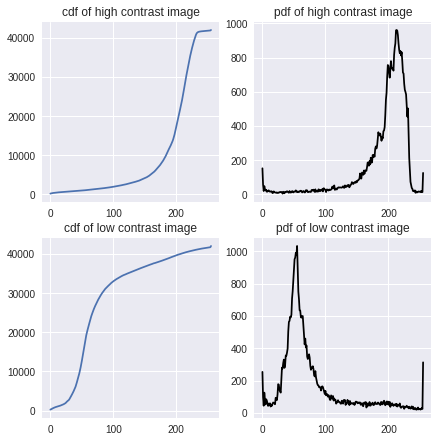

In [8]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

# plot cumulative histograms
plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of high contrast image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('pdf of high contrast image')

plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of low contrast image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('pdf of low contrast image')

# adjust the placement of subplots
plt.subplots_adjust(bottom=2, right=0.8, top=3)

plt.show()

## 3-Histogram manipulation

In order to continue image manipulation, first of all, we change the RGB images to grayscale using `cv2.cvtColor()`.



In [0]:
low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

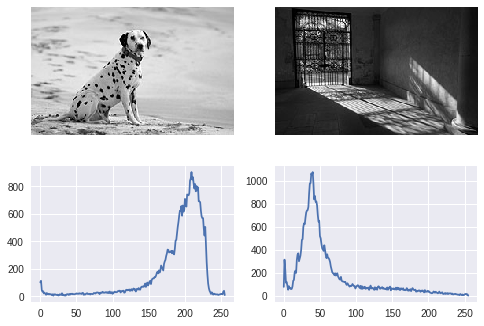

In [10]:
# show images and their histograms
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()

### 3-1 Brightness

In order to change the brightness and contrast of an image, two parameters are often used as $\alpha$ and $\beta$ for *contrast* and *brightness*, respectively.

$g(i,j) = \alpha \cdot f(i,j) + \beta$

`manip_image(image, alpha, beta)` function gets $\alpha$ and $\beta$ and produces the output image.

Below, we just manipulate the brightness value ($\beta$) and leave $\alpha = 1$.

In [0]:
# Define a function to easily handle manipulation.
def manip_image(image, alpha, beta):
  
  new_image = np.zeros(image.shape, image.dtype)
  
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
  
  return new_image

(<matplotlib.axes._subplots.AxesSubplot at 0x7f36de8f3a90>,
 [<matplotlib.lines.Line2D at 0x7f36de852358>])

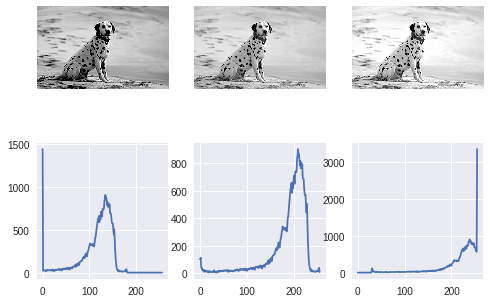

In [12]:
# Test on the high contrast image
h_bright = manip_image(high_gray, 1, 30)
h_dark = manip_image(high_gray, 1, -75)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(h_dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(h_bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234), plt.plot(cv2.calcHist([h_dark],[0],None,[256],[0,256]))
plt.subplot(235), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))
plt.subplot(236), plt.plot(cv2.calcHist([h_bright],[0],None,[256],[0,256]))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f36de712fd0>,
 [<matplotlib.lines.Line2D at 0x7f36de7428d0>])

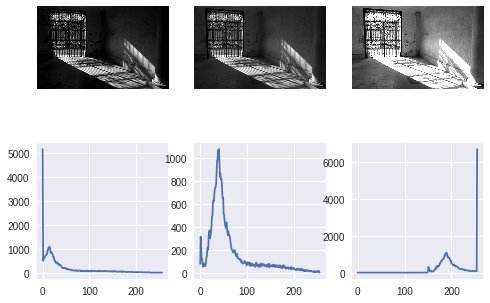

In [13]:
# Test on the low contrast image
l_bright = manip_image(low_gray, 1, 150)
l_dark = manip_image(low_gray, 1, -25)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(l_dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(l_bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234), plt.plot(cv2.calcHist([l_dark],[0],None,[256],[0,256]))
plt.subplot(235), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))
plt.subplot(236), plt.plot(cv2.calcHist([l_bright],[0],None,[256],[0,256]))

## Histogram equalization

